In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

%load_ext lab_black

The lab_black extension is already loaded. To reload it, use:
  %reload_ext lab_black


In [126]:
# mpl.rcParams["axes.prop_cycle"] = mpl.cycler(color=["#4d0a17", "#2745db", "#2a5435"])

plt.rcParams["image.cmap"] = "viridis"

In [127]:
# plt.style.use("fivethirtyeight")
plt.rcParams["figure.figsize"] = (10, 7)

## Load Dataset and initial exploration

In [128]:
df = pd.read_csv("train.csv")

In [129]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Lets create a suport function to enhance our visuals

In [131]:
def color_map(feature):
    # Colours - Choose the extreme colours of the colour map
    colours = ["#87AFE8", "#001533"]
    max_value = feature.max()
    min_value = feature.min()
    cmap = mpl.colors.LinearSegmentedColormap.from_list("colour_map", colours, N=256)
    norm = mpl.colors.Normalize(min_value, max_value)
    return cmap, norm

Text(0.5, 1.0, 'Male vs female on board')

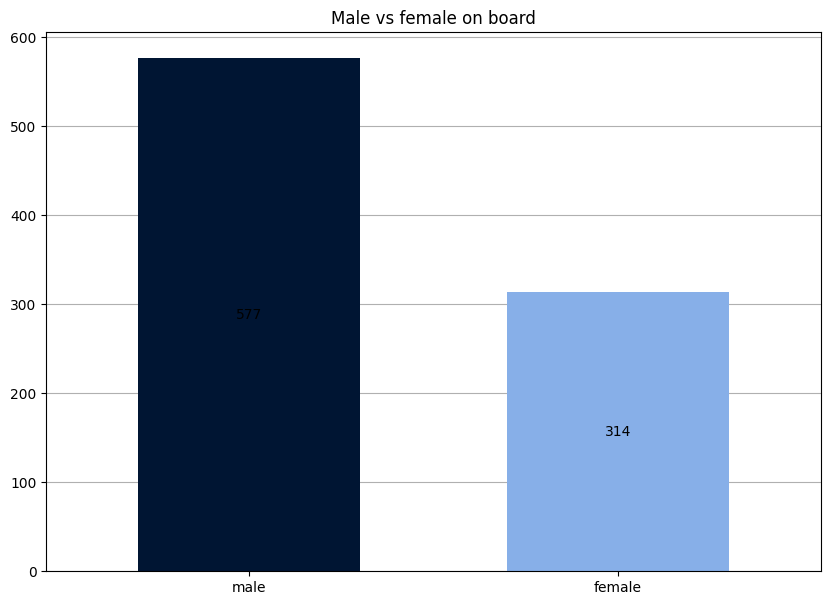

In [132]:
sex_group = df.groupby("Sex").size()
cmap, norm = color_map(sex_group)
df["Sex"].value_counts().plot(
    kind="bar", color=cmap(norm(df["Sex"].value_counts())), width=0.6, zorder=2
)
plt.grid(axis="y", zorder=0)
plt.xticks(rotation=0)
plt.bar_label(plt.gca().containers[0], fmt="%.0f", label_type="center")
plt.title("Male vs female on board")

In [133]:
def catgegorize_age(age):
    if age < 10:
        return 0
    if age < 10:
        return 0
    if 18 < age < 65:
        return "adult"
    else:
        return "elder"

In [134]:
df["age_category"] = np.where(
    df["Age"] < 18, "Child", np.where(df["Age"] > 65, "Elder", "Adult")
)

Let´s check out the age distribution

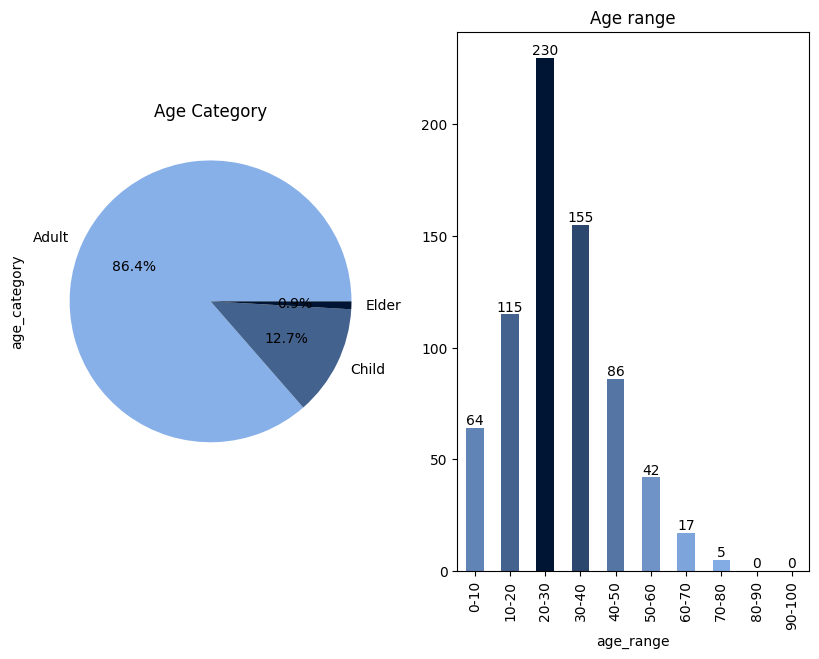

In [135]:
# Elderly >65
# Child < 18
fig, ax = plt.subplots(1, 2)

df["age_category"].value_counts().plot(
    kind="pie", title="Age Category", ax=ax[0], autopct="%.1f%%", cmap=cmap
)
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
df["age_range"] = pd.cut(
    df["Age"],
    age_bins,
    labels=[
        "0-10",
        "10-20",
        "20-30",
        "30-40",
        "40-50",
        "50-60",
        "60-70",
        "70-80",
        "80-90",
        "90-100",
    ],
)

grouped_ages = df.groupby("age_range").size()
cmap, norm = color_map(grouped_ages)
p1 = grouped_ages.plot(
    kind="bar", ax=ax[1], color=cmap(norm(grouped_ages)), title="Age range"
)
p1.bar_label(p1.containers[0])
plt.show()

### Survival

In [136]:
df["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

Text(0, 0.5, '')

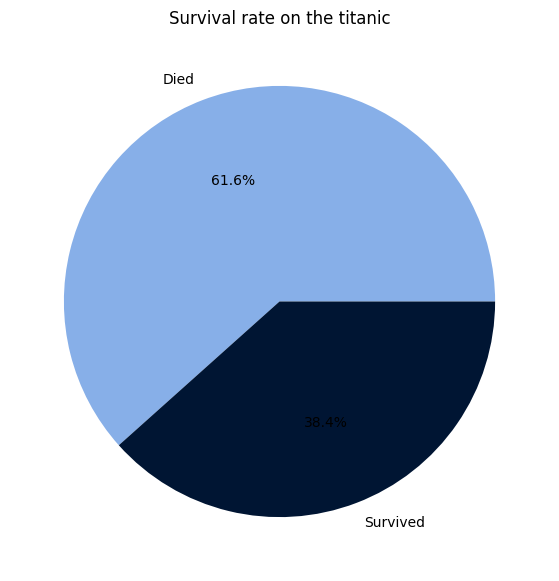

In [137]:
df["Survived"].value_counts().plot(
    kind="pie",
    labels=["Died", "Survived"],
    autopct="%.1f%%",
    title="Survival rate on the titanic",
    cmap=cmap,  # label color white
)


plt.ylabel("")

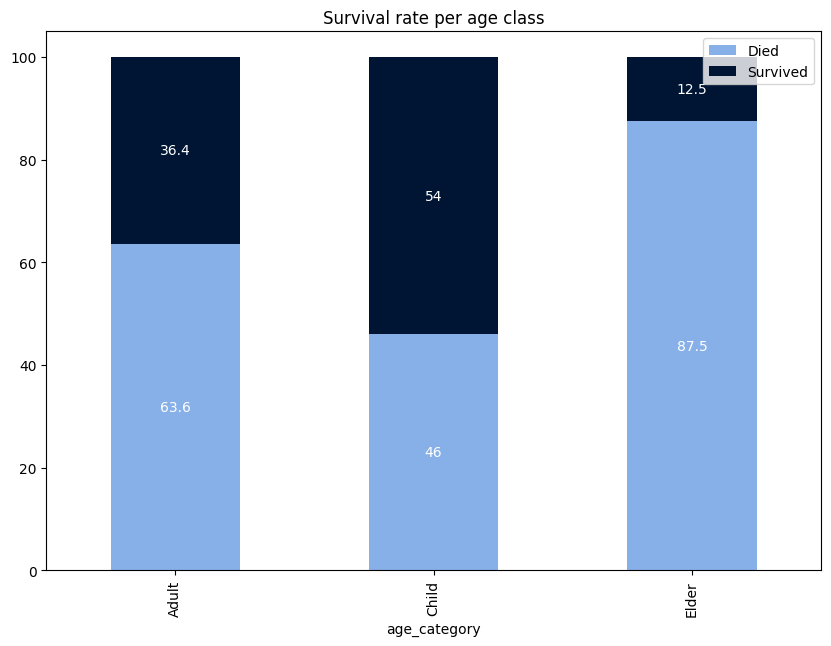

In [138]:
fig, ax = plt.subplots(1, 1)
survivors_age_cat = (
    df.groupby("age_category")["Survived"]
    .value_counts(normalize=True)
    .unstack()
    .mul(100)
    .round(1)
)

survivors_age_cat.plot.bar(stacked=True, ax=ax, cmap=cmap)
plt.legend(labels=["Died", "Survived"])
plt.title("Survival rate per age class")
# font color white
for containers in ax.containers:
    plt.bar_label(containers, label_type="center", color="w")

plt.show()

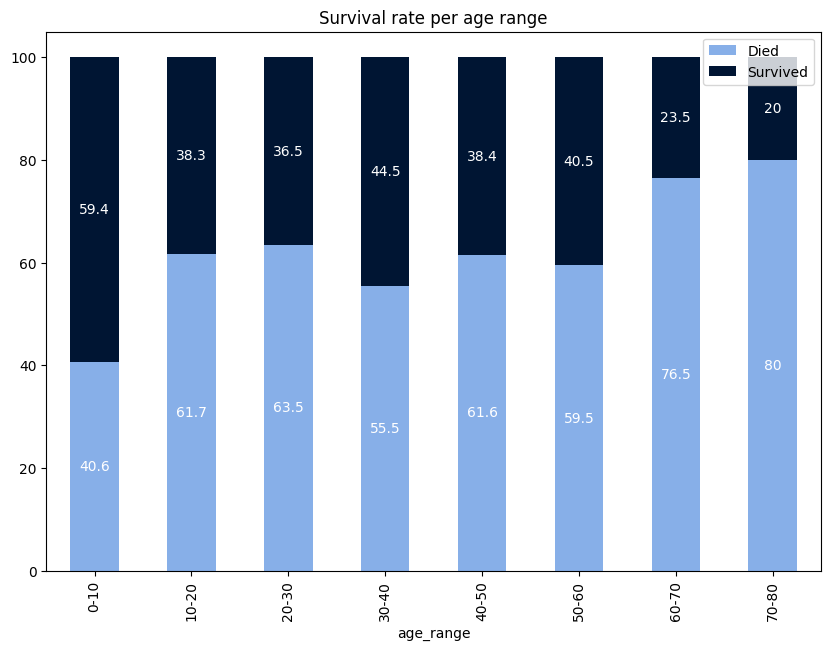

In [139]:
survivors_age_range = (
    df.groupby("age_range", observed=True)["Survived"]
    .value_counts(normalize=True)
    .unstack()
    .mul(100)
    .round(1)
)

fig, ax = plt.subplots(1, 1)
survivors_age_range.plot.bar(stacked=True, ax=ax, cmap=cmap)
plt.legend(labels=["Died", "Survived"], loc="best")
plt.title("Survival rate per age range")
for containers in ax.containers:
    plt.bar_label(containers, label_type="center", color="w")

plt.show()

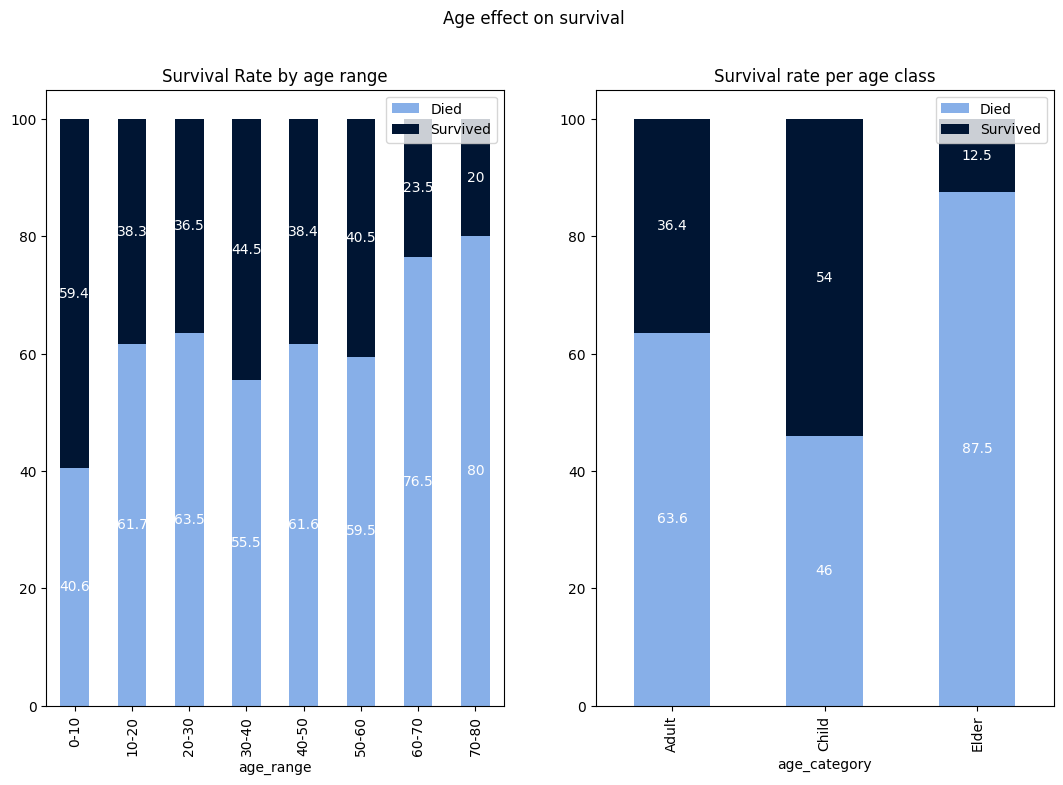

In [140]:
fig, ax = plt.subplots(1, 2, figsize=(13, 8))

survivors_age_range = (
    df.groupby("age_range", observed=True)["Survived"]
    .value_counts(normalize=True)
    .unstack()
    .mul(100)
    .round(1)
)

survivors_age_range.plot.bar(
    stacked=True, ax=ax[0], title="Survival Rate by age range", cmap=cmap
)
ax[0].legend(labels=["Died", "Survived"], loc="best")
for containers in ax[0].containers:
    ax[0].bar_label(containers, label_type="center", color="w")

survivors_age_cat = (
    df.groupby("age_category")["Survived"]
    .value_counts(normalize=True)
    .unstack()
    .mul(100)
    .round(1)
)

survivors_age_cat.plot.bar(
    stacked=True, ax=ax[1], title="Survival rate per age class", cmap=cmap
)
ax[1].legend(labels=["Died", "Survived"])
for containers in ax[1].containers:
    ax[1].bar_label(containers, label_type="center", color="w")
plt.suptitle("Age effect on survival")
plt.show()

Cleary children survived more than any of the other categories. Lets take a look at the gender, the Pclass and even the fair. There also seems like the older you are the less chances of surviving

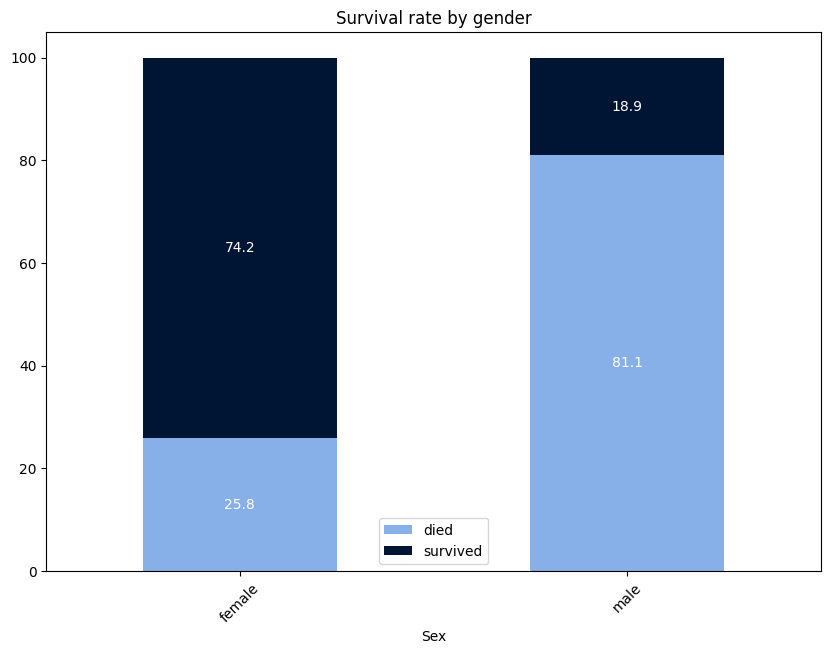

In [141]:
survival_gender = (
    df.groupby("Sex")["Survived"]
    .value_counts(normalize=True)
    .unstack()
    .mul(100)
    .round(1)
)
fig, ax = plt.subplots()
survival_gender.plot.bar(stacked=True, ax=ax, cmap=cmap)
plt.legend(["died", "survived"])
for containers in ax.containers:
    plt.bar_label(containers, label_type="center", color="w")
plt.xticks(rotation=45)
plt.title("Survival rate by gender")
plt.show()

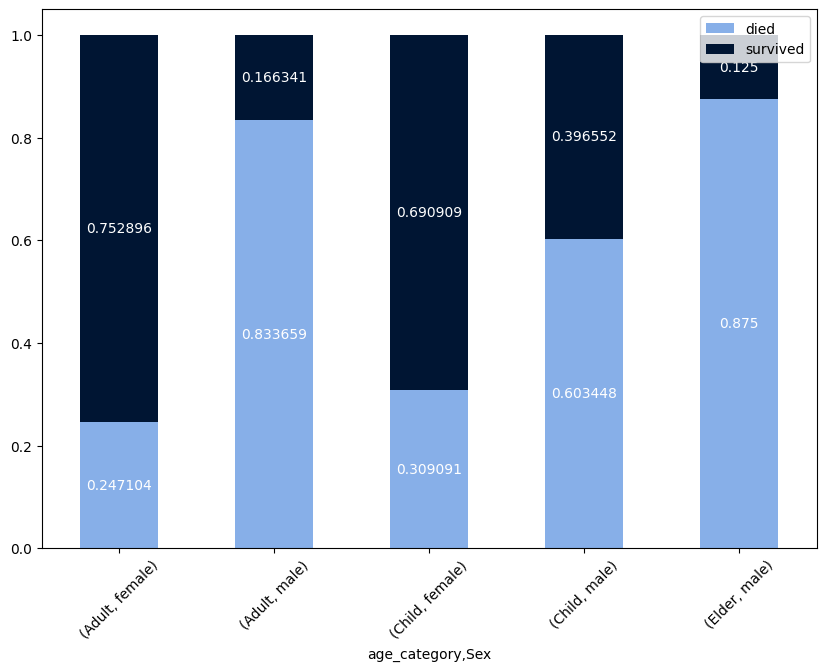

In [142]:
fig, ax = plt.subplots()
df.groupby(["age_category", "Sex"])["Survived"].value_counts(
    normalize=True
).unstack().plot.bar(stacked=True, cmap=cmap, ax=ax)
plt.legend(["died", "survived"])
plt.xticks(rotation=45)
for containers in ax.containers:
    plt.bar_label(containers, label_type="center", color="w")

plt.show()

In [143]:
# Create faeture has family, based on SibSp and Parch
df["has_family"] = np.where(df["SibSp"] + df["Parch"] > 0, 1, 0)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_category,age_range,has_family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Adult,20-30,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult,30-40,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adult,20-30,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult,30-40,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Adult,30-40,0


In [144]:
# Missing Values
df.isnull().sum()
df_clean = df.dropna(subset="Age").copy()

In [145]:
df_clean.isnull().sum()
print(f"We dropped {df.shape[0] - df_clean.shape[0]} rows")

We dropped 177 rows


In [146]:
# Encode categorical variables
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
# Use label encoder on age_category and Sex
df_clean["age_category_encoded"] = labelencoder.fit_transform(df_clean["age_category"])
df_clean["Sex_encoded"] = labelencoder.fit_transform(df_clean["Sex"])

In [147]:
df_clean.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_category,age_range,has_family,age_category_encoded,Sex_encoded
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Adult,20-30,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult,30-40,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adult,20-30,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult,30-40,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Adult,30-40,0,0,1


### Correlation between features and target

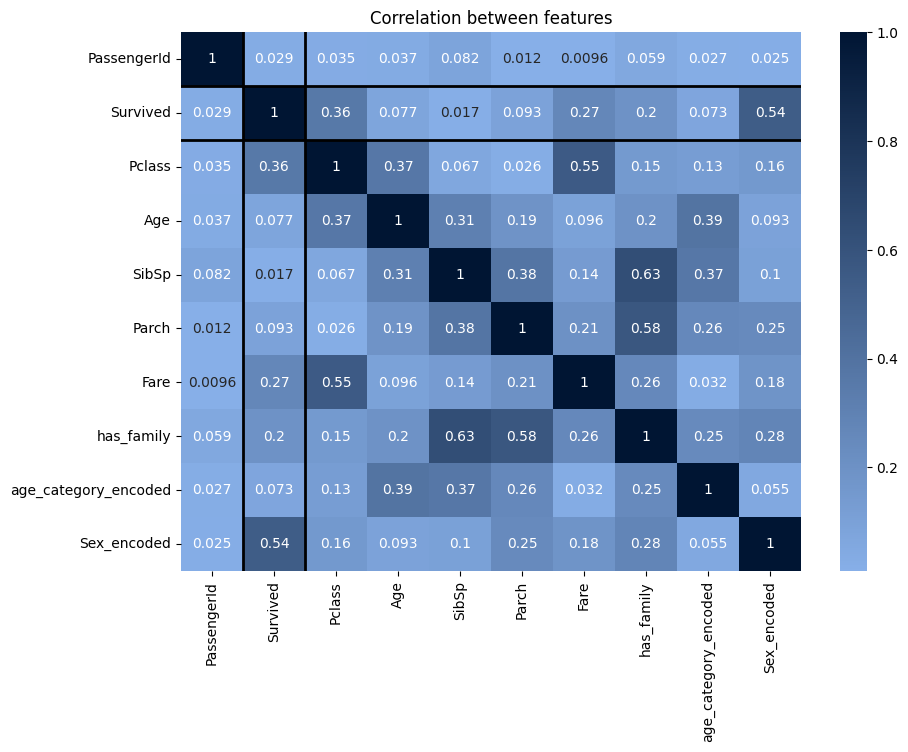

In [148]:
# Correlation matrix between features and highlight target

sns.heatmap(df_clean.corr(numeric_only=True).abs(), annot=True, cmap=cmap)
plt.axhline(y=1, color="k", linewidth=2)
plt.axhline(y=2, color="k", linewidth=2)
plt.axvline(x=1, color="k", linewidth=2)
plt.axvline(x=2, color="k", linewidth=2)


plt.title("Correlation between features")
plt.show()

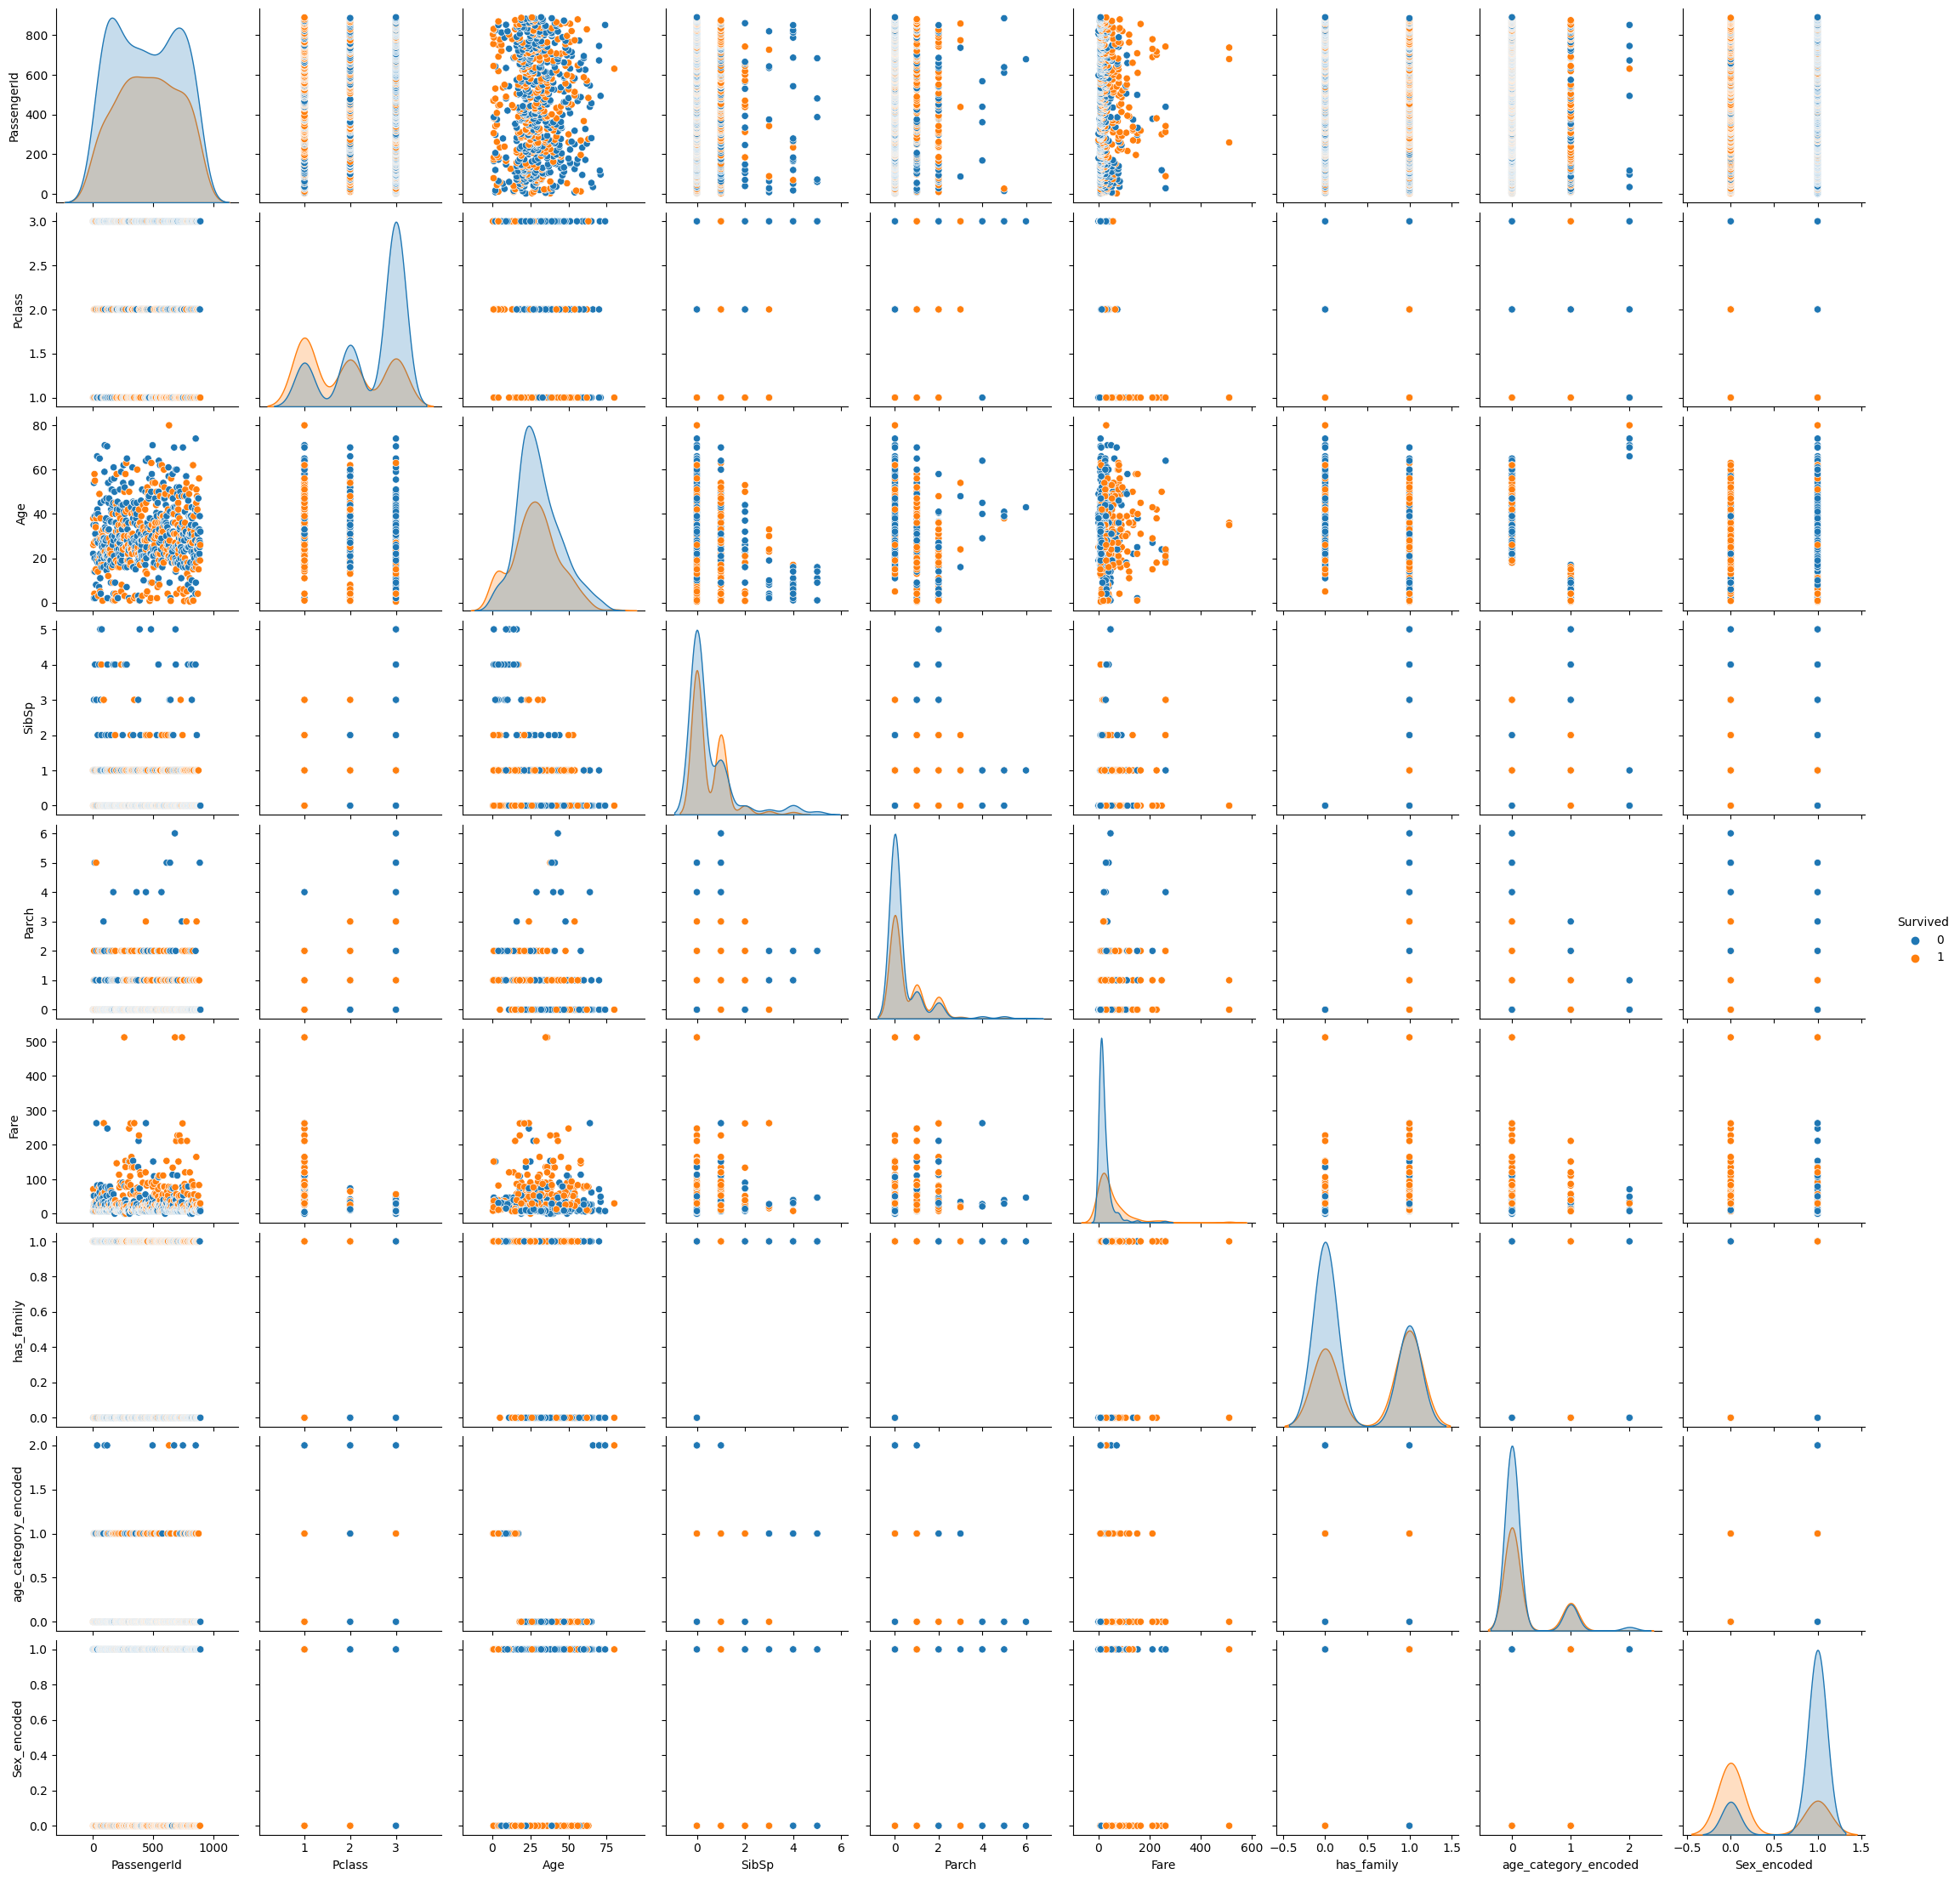

In [157]:
sns.pairplot(df_clean, hue="Survived")
plt.show()

In [158]:
# Build a model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Import Xgboost
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [159]:
X = df_clean[
    [
        col
        for col in df_clean.columns
        if col
        not in [
            "Survived",
            "PassengerId",
            "Name",
            "Ticket",
            "age_range",
            "Cabin",
            "Sex",
            "age_category",
            "Embarked",
        ]
    ]
]
y = df_clean["Survived"]

In [160]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [161]:
# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Confusion Matrix: {confusion_matrix(y_test, y_pred)}")
print(f"Classification Report: {classification_report(y_test, y_pred)}")

Accuracy: 0.7832167832167832
Confusion Matrix: [[71 16]
 [15 41]]
Classification Report:               precision    recall  f1-score   support

           0       0.83      0.82      0.82        87
           1       0.72      0.73      0.73        56

    accuracy                           0.78       143
   macro avg       0.77      0.77      0.77       143
weighted avg       0.78      0.78      0.78       143



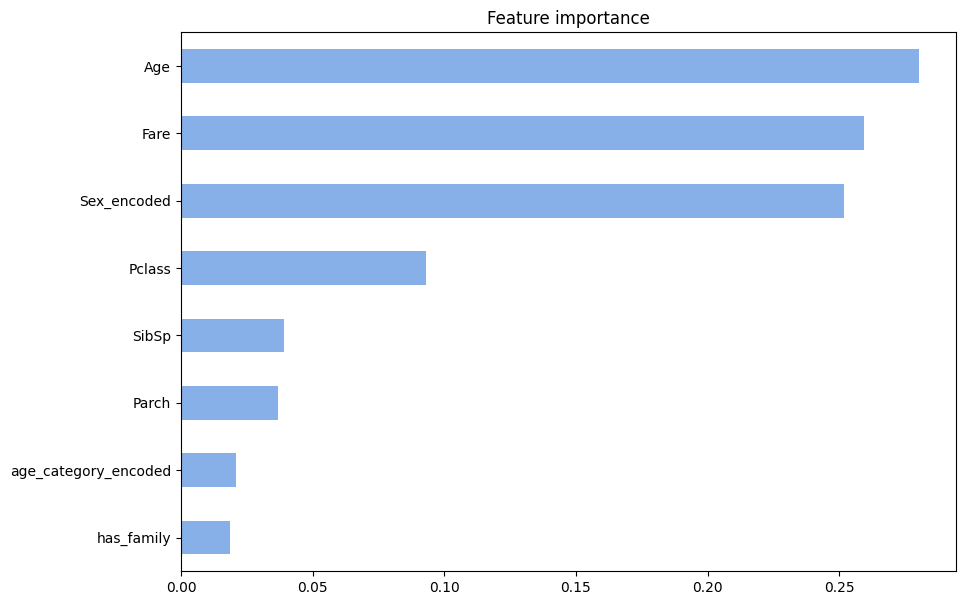

In [163]:
# Plot feature importance
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values().plot(kind="barh", cmap=cmap)
plt.title("Feature importance")
plt.show()

In [166]:
# plot confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay

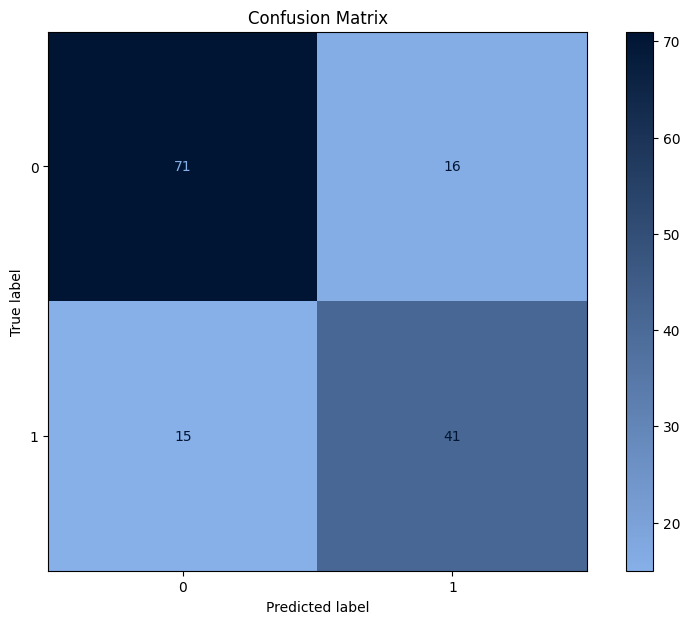

In [167]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot(cmap=cmap)
plt.title("Confusion Matrix")
plt.show()